<a href="https://colab.research.google.com/github/Sufi26/DL/blob/main/DL_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Use Autoencoder to implement anomaly detection. Build the model by using:
#a. Import required libraries

#c. Encoder converts it into latent representation

#d. Decoder networks convert it back to the original input

#e. Compile the models with Optimizer, Loss, and Evaluation Metrics



In [3]:
import keras
from keras import layers

In [4]:
# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats


In [5]:
# This is our input image
input_img = keras.Input(shape=(784,))

In [6]:
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)

In [7]:
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

In [8]:
# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)
autoencoder.layers

In [9]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [10]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))

In [11]:
# Retrieve the last layer of the autoencoder model (output layer)
decoder_layer = autoencoder.layers[-1]


In [12]:
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [13]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [14]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [15]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [16]:
autoencoder.fit(x_train, x_train,
                epochs=40,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/40
235/235 [==============================] - 3s 10ms/step - loss: 0.2768 - val_loss: 0.1910
Epoch 2/40
235/235 [==============================] - 2s 10ms/step - loss: 0.1717 - val_loss: 0.1540
Epoch 3/40
235/235 [==============================] - 3s 14ms/step - loss: 0.1446 - val_loss: 0.1340
Epoch 4/40
235/235 [==============================] - 3s 14ms/step - loss: 0.1289 - val_loss: 0.1216
Epoch 5/40
235/235 [==============================] - 3s 13ms/step - loss: 0.1183 - val_loss: 0.1127
Epoch 6/40
235/235 [==============================] - 2s 10ms/step - loss: 0.1109 - val_loss: 0.1066
Epoch 7/40
235/235 [==============================] - 2s 9ms/step - loss: 0.1055 - val_loss: 0.1019
Epoch 8/40
235/235 [==============================] - 4s 19ms/step - loss: 0.1016 - val_loss: 0.0987
Epoch 9/40
235/235 [==============================] - 4s 19ms/step - loss: 0.0989 - val_loss: 0.0965
Epoch 10/40
235/235 [==============================] - 4s 17ms/step - loss: 0.0971 - val_los

In [18]:

# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 2ms/step


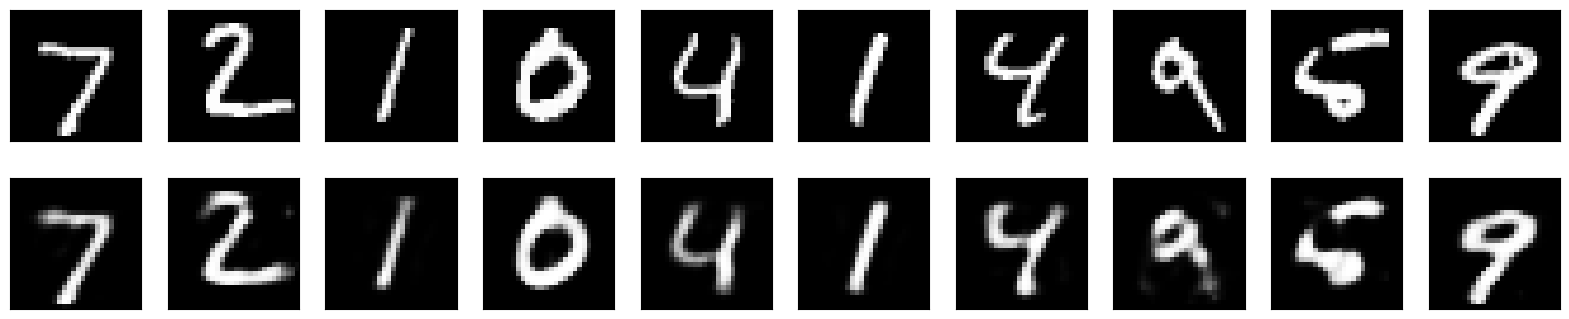

In [19]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

